In [30]:
import re
import numpy as np
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leo_2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
file_path = 'Quijote.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

In [32]:
def remove_accents(word):
    # Definimos un diccionario con los caracteres acentuados en minúsculas y sus equivalentes sin acento
    accents_mapping = {
        'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u'
    }
    # Reemplazamos los caracteres acentuados por sus equivalentes sin acento
    for accented_char, unaccented_char in accents_mapping.items():
        word = word.replace(accented_char, unaccented_char)
    return word

In [33]:
# Tokenizar el texto y calcular frecuencias de palabras
# Utilizamos split para dividir el texto en palabras y convertimos a minúscula
words = re.split(r'\W+', text.lower())
# Eliminamos los acentos de las palabras
words_without_accents = [remove_accents(word) for word in words]
# Eliminamos los signos de puntuación
translation_table = str.maketrans('', '', string.punctuation)
words_without_punctuation = [word.translate(translation_table) for word in words_without_accents]
word_freq = {}
for word in words_without_punctuation:
    if word in word_freq:
        word_freq[word] += 1
    else:
        word_freq[word] = 1

In [34]:
# Ordenar palabras por frecuencia descendente
sorted_word_freq = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True))

# Obtener los datos crudos
x = np.arange(1, len(sorted_word_freq) + 1)
y = np.array(list(sorted_word_freq.values()))

In [35]:
# Ajustar la curva
coefficients = np.polyfit(np.log(x_data), np.log(y_data), 1)
polynomial = np.poly1d(coefficients)

In [36]:
# Generar datos estimados para gráfico
y_estimated = np.exp(polynomial(np.log(x_data)))

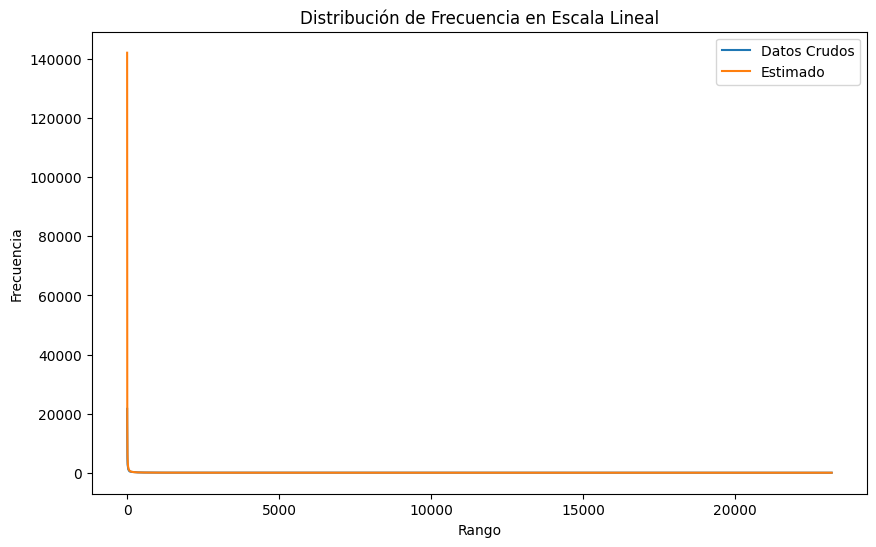

In [37]:
# Graficar en escala lineal
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Datos Crudos')
plt.plot(x, y_estimated, label='Estimado')
plt.title('Distribución de Frecuencia en Escala Lineal')
plt.xlabel('Rango')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

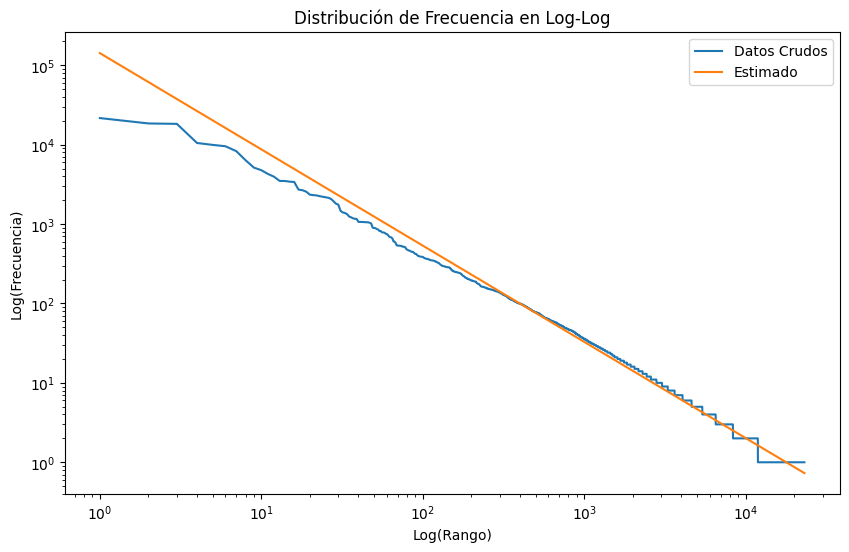

In [38]:
# Graficar en log-log
plt.figure(figsize=(10, 6))
plt.loglog(x, y, label='Datos Crudos')
plt.loglog(x, y_estimated, label='Estimado')
plt.title('Distribución de Frecuencia en Log-Log')
plt.xlabel('Log(Rango)')
plt.ylabel('Log(Frecuencia)')
plt.legend()
plt.show()

In [39]:
# Imprimir coeficientes del ajuste
print("Coeficientes del ajuste: ", coefficients)

Coeficientes del ajuste:  [-1.21181681 11.86472091]


In [41]:
# Calcular la cantidad de palabras que debería haber en el 10%, 20% y 30% del vocabulario según la ley de Zipf
total_palabras = len(sorted_word_freq)
palabras_10porc = int(0.1 * total_palabras)
palabras_20porc = int(0.2 * total_palabras)
palabras_30porc = int(0.3 * total_palabras)

# Determinar qué palabras corresponden al 10%, 20% y 30% de la frecuencia acumulada
palabras_10 = list(sorted_word_freq.keys())[:palabras_10porc]
palabras_20 = list(sorted_word_freq.keys())[:palabras_20porc]
palabras_30 = list(sorted_word_freq.keys())[:palabras_30porc]

In [42]:
# Obtener stopwords en español
stopwords_espanol = set(stopwords.words('spanish'))

# Calcular porcentaje de palabras stopwords en cada porcentaje del vocabulario
porcentaje_stopwords_10 = sum(1 for palabra in palabras_10 if palabra in stopwords_espanol) / palabras_10porc
porcentaje_stopwords_20 = sum(1 for palabra in palabras_20 if palabra in stopwords_espanol) / palabras_20porc
porcentaje_stopwords_30 = sum(1 for palabra in palabras_30 if palabra in stopwords_espanol) / palabras_30porc

print("Porcentaje de palabras stopwords en el 10% del vocabulario:", porcentaje_stopwords_10)
print("Porcentaje de palabras stopwords en el 20% del vocabulario:", porcentaje_stopwords_20)
print("Porcentaje de palabras stopwords en el 30% del vocabulario:", porcentaje_stopwords_30)

Porcentaje de palabras stopwords en el 10% del vocabulario: 0.06778929188255613
Porcentaje de palabras stopwords en el 20% del vocabulario: 0.03755665875242823
Porcentaje de palabras stopwords en el 30% del vocabulario: 0.026618705035971222


In [43]:
# Extraer palabras podadas que no son stopwords
palabras_podadas_10 = [palabra for palabra in palabras_10 if palabra not in stopwords_espanol]
palabras_podadas_20 = [palabra for palabra in palabras_20 if palabra not in stopwords_espanol]
palabras_podadas_30 = [palabra for palabra in palabras_30 if palabra not in stopwords_espanol]

print("Palabras podadas en el 10% del vocabulario que no son stopwords:", palabras_podadas_10)
print("Palabras podadas en el 20% del vocabulario que no son stopwords:", palabras_podadas_20)
print("Palabras podadas en el 30% del vocabulario que no son stopwords:", palabras_podadas_30)

Palabras podadas en el 10% del vocabulario que no son stopwords: ['don', 'si', 'mas', 'quijote', 'sancho', 'dijo', 'tan', 'señor', 'asi', 'respondio', 'ser', 'bien', 'habia', 'merced', 'pues', 'sino', 'dos', 'caballero', 'decir', 'hacer', 'aquel', 'dios', 'aunque', 'señora', 'aqui', 'mal', 'cosa', 'buen', 'verdad', 'tal', 'alli', 'ver', 'mundo', 'luego', 'alguna', 'todas', 'dicho', 'dar', 'ahora', 'cosas', 'parte', 'buena', 'vida', 'aquella', 'panza', 'tenia', 'menos', 'lugar', 'aun', 'gran', 'casa', 'manera', 'tiempo', 'toda', 'digo', 'cura', 'puesto', 'mano', 'dio', 'amo', 'solo', 'mejor', 'caballeros', 'dulcinea', 'visto', 'puede', 'ojos', 'algun', 'tierra', 'dia', 'hecho', 'historia', 'quiero', 'padre', 'hombre', 'haber', 'cuanto', 'habian', 'cielo', 'vio', 'escudero', 'amigo', 'hizo', 'camino', 'saber', 'parece', 'muchas', 'tener', 'desta', 'fin', 'dias', 'manos', 'tres', 'tambien', 'cuenta', 'mujer', 'dice', 'sera', 'cada', 'mesmo', 'cabeza', 'punto', 'vos', 'noche', 'replico', '